In [659]:
import pandas as pd

entrada = pd.read_csv("entrada.csv", index_col=0, encoding = "ISO-8859-1")

In [660]:
def lerEntrada(entrada):
    grafo = {}
    for i in entrada:
        vizinhos = []
        for j in range(1,len(entrada[i])+1):
            if entrada[str(i)][j] == 1:
                vizinhos.append(str(entrada.index[j-1]))
                
        grafo[i] = vizinhos
    return grafo

In [661]:
grafo = lerEntrada(entrada)
grafo

{'1': ['2', '3'],
 '2': ['1', '4', '5'],
 '3': ['1', '2', '5'],
 '4': ['6'],
 '5': ['2', '3', '6'],
 '6': ['4', '5', '7'],
 '7': ['6']}

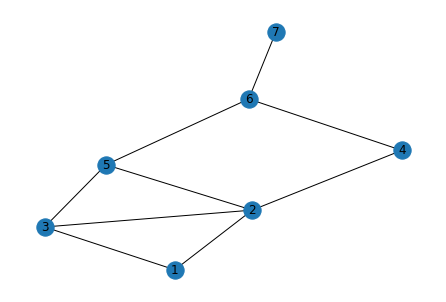

In [662]:
import networkx as nx

def mostrar(grafo):
    g = nx.Graph()

    for i in grafo:
        g.add_node(i)
        for j in grafo[i]:
            g.add_edge(i,j)

    nx.spring_layout(g, k=0.15)
    nx.draw(g, with_labels=True)

mostrar(grafo)


In [663]:
def recursivo(grafo, vertice, G, auxiliar=[]):
    auxiliar += [vertice]
    G.add_node(vertice)
    print(vertice)

    for vizinho in grafo[vertice]:
        if vizinho not in auxiliar:
            G.add_edge(vertice, vizinho)
            recursivo(grafo, vizinho, G, auxiliar)

    return G


In [664]:
import networkx as nx
import random

#Desenha a árvore
def arvore(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))
        else:
            root = random.choice(list(G.nodes))

    def _arvore(G, root, width=1, vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
    
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        filhos = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            filhos.remove(parent)  
        if len(filhos)!=0:
            dx = width/len(filhos) 
            nextx = xcenter - width/2 - dx/2
            for filho in filhos:
                nextx += dx
                pos = _arvore(G,filho, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos

            
    return _arvore(G, root, width, vert_gap, vert_loc, xcenter)

4
6
5
2
1
3
7


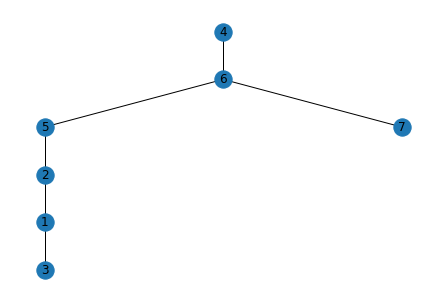

In [665]:
G = nx.Graph()
vertice_inicial = '4'

recursivo(grafo, vertice_inicial, G)

pos = arvore(G, vertice_inicial)
nx.draw(G, pos=pos, with_labels=True)